<a href="https://colab.research.google.com/github/shoryapratap/India-Accelerator-OpenXAI-2025/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a credit card fraud detection project using the dataset from "/content/creditcard.csv". The project should include data loading, exploration, visualization, handling data imbalance, data preprocessing, data splitting, training a Random Forest classification model, model evaluation with appropriate metrics for imbalanced data, and interpretation of results. Include visualizations, comments, and descriptions of data processing methods at each step.

## Load the data

### Subtask:
Load the credit card transaction data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset from the CSV file into a pandas DataFrame, then display the first 5 rows.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Explore the data

### Subtask:
Perform initial data exploration to understand the dataset's structure, identify missing values, and analyze the distribution of features, including the target variable (fraudulent vs. legitimate transactions).


**Reasoning**:
Display the shape, data types, missing values, descriptive statistics, and class distribution of the dataframe as requested in the instructions for initial data exploration.



In [ ]:
# 1. Display the number of rows and columns
print("Shape of the DataFrame:", df.shape)

# 2. Display the data types of each column
print("\nData types of each column:")
display(df.dtypes)

# 3. Check for and display the count of missing values
print("\nMissing values count per column:")
display(df.isnull().sum())

# 4. Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# 5. Display value counts and percentages for the 'Class' column
print("\nValue counts for the 'Class' column:")
display(df['Class'].value_counts())
print("\nPercentage of transactions by 'Class':")
display(df['Class'].value_counts(normalize=True) * 100)

Shape of the DataFrame: (55551, 31)

Data types of each column:


,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64



Missing values count per column:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0



Descriptive statistics for numerical columns:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,...,55550.000000,55550.000000,55550.000000,55550.000000,55550.000000,55550.000000,55550.000000,55550.000000,55550.000000,55550.000000
mean,30593.297438,-0.242712,-0.003647,0.691422,0.176704,-0.259108,0.101075,-0.117926,0.055073,0.082709,...,-0.028758,-0.107167,-0.038779,0.007005,0.134820,0.020698,0.003723,0.004178,94.706159,0.002808
std,13417.206531,1.874492,1.646638,1.469689,1.390191,1.406023,1.310300,1.263701,1.201861,1.195036,...,0.726547,0.636713,0.591365,0.595828,0.438300,0.499660,0.385969,0.327168,256.951934,0.052919
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,24650.000000,-0.995659,-0.576212,0.210839,-0.724377,-0.875414,-0.636850,-0.605745,-0.146478,-0.636440,...,-0.230060,-0.528848,-0.179555,-0.323874,-0.129129,-0.330362,-0.063604,-0.006497,7.680000,0.000000
50%,34700.000000,-0.250987,0.078237,0.788023,0.187527,-0.292173,-0.153096,-0.075137,0.059987,-0.023887,...,-0.065460,-0.082633,-0.051642,0.061907,0.173830,-0.073836,0.008763,0.022443,25.765000,0.000000
75%,40776.000000,1.154616,0.733392,1.420950,1.057956,0.279688,0.491908,0.425462,0.334543,0.764475,...,0.110489,0.307371,0.079145,0.401830,0.421044,0.299391,0.082852,0.076489,87.000000,0.000000
max,47005.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000



Value counts for the 'Class' column:


,count
Class,
0.0,55394
1.0,156



Percentage of transactions by 'Class':


,proportion
Class,
0.0,99.719172
1.0,0.280828


## Visualize the data

### Subtask:
Create visualizations to understand the data better, such as the distribution of transaction amounts, time, and the class distribution (fraudulent vs. non-fraudulent).


**Reasoning**:
Create visualizations for transaction amounts, time, and class distribution as instructed.



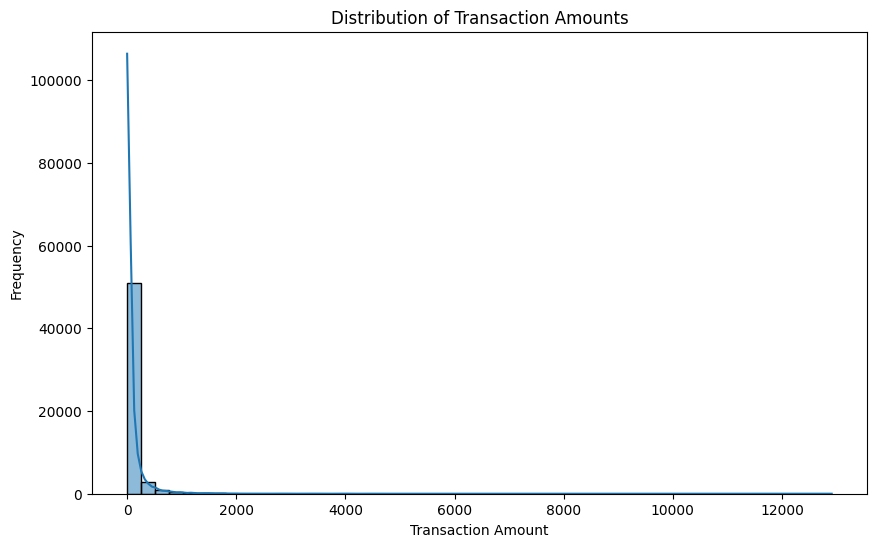

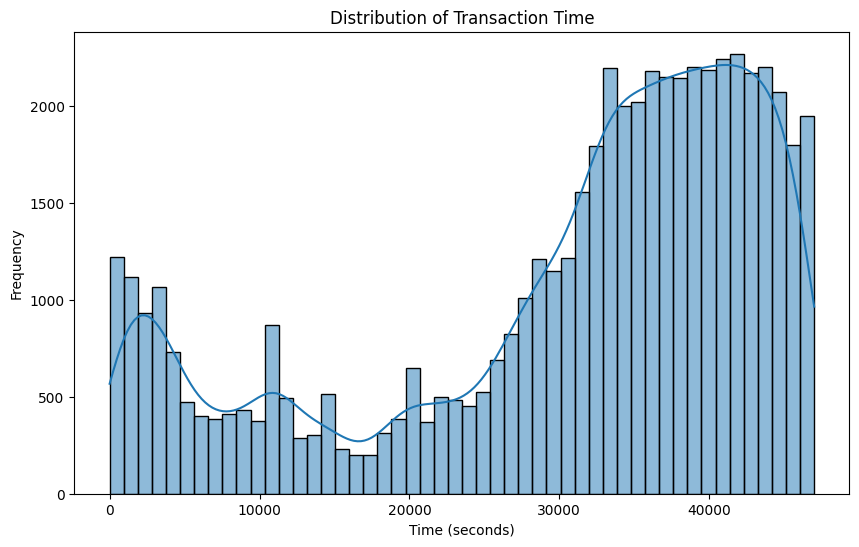

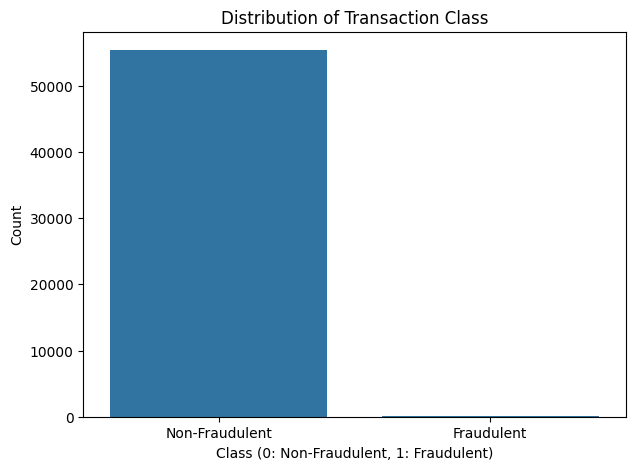

In [ ]:
# Create a histogram of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of the 'Time' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Create a count plot of the 'Class' column
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transaction Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

## Handle data imbalance

### Subtask:
Address the class imbalance issue, as fraudulent transactions are typically rare compared to legitimate ones. Techniques like oversampling or undersampling can be used.


**Reasoning**:
Drop rows with missing values, separate features and target, oversample the minority class, and print the new class distribution.



In [ ]:
# 1. Drop rows with missing values
df.dropna(inplace=True)

# 2. Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Import and instantiate RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42) # Using a random_state for reproducibility

# 4. Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# 5. Print value counts of oversampled target
print("Value counts for the oversampled 'Class' column:")
display(y_resampled.value_counts())

Value counts for the oversampled 'Class' column:


,count
Class,
0.0,55394
1.0,55394


## Preprocess the data

### Subtask:
Prepare the data for the Random Forest model. This might involve scaling numerical features if necessary, although tree-based models are less sensitive to scaling.


**Reasoning**:
Scale the features using StandardScaler as requested in the instructions.



In [ ]:
# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the resampled feature data
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_resampled.columns)

display(X_scaled.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.186527,0.348340,-0.645853,0.875361,-0.436828,0.468732,0.825927,0.668534,-0.397461,0.764441,...,0.003853,-0.380886,0.588646,0.039704,0.190130,-0.078786,-0.581194,-0.166796,-0.079524,0.223658
1,-2.186527,0.711654,-0.564954,0.585749,-0.697155,0.543070,0.529202,0.617526,-0.400598,0.533625,...,-0.372663,-0.557997,-0.637410,0.198301,-0.528287,-0.029822,0.114849,-0.314178,-0.008638,-0.382093
2,-2.186453,0.348546,-0.948361,0.782101,-0.716295,0.437963,1.554795,0.756943,-0.363080,0.064239,...,0.325238,-0.153548,1.249280,0.803537,-1.145435,-0.656992,-0.470674,-0.362122,-0.156199,1.167925
3,-2.186453,0.404373,-0.672692,0.784519,-1.064257,0.529946,1.253415,0.668215,-0.333134,0.111814,...,-0.535906,-0.457712,0.224025,-0.020096,-2.004295,0.578835,-0.653699,-0.240037,0.083956,0.115972
4,-2.186378,0.377040,-0.418975,0.754667,-0.709786,0.455879,0.626313,0.725140,-0.482670,0.933655,...,0.188448,-0.373309,1.284863,0.019495,0.321423,-0.502825,0.946535,-0.078017,0.388478,-0.104634


## Split the data

### Subtask:
Split the dataset into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Split the scaled feature data and the resampled target data into training and testing sets.



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (88630, 30)
Shape of X_test: (22158, 30)
Shape of y_train: (88630,)
Shape of y_test: (22158,)


## Train the random forest model

### Subtask:
Train a Random Forest classifier on the training data.


**Reasoning**:
Import the Random Forest Classifier and train the model on the training data.



In [ ]:
# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance using appropriate metrics for imbalanced datasets, such as precision, recall, F1-score, and the confusion matrix.


**Reasoning**:
Import the necessary metrics for model evaluation and then use the trained model to make predictions on the test set.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

**Reasoning**:
Generate and print the classification report and confusion matrix to evaluate the model's performance on the test set using appropriate metrics for imbalanced datasets.



In [ ]:
# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11172
         1.0       1.00      1.00      1.00     10986

    accuracy                           1.00     22158
   macro avg       1.00      1.00      1.00     22158
weighted avg       1.00      1.00      1.00     22158


Confusion Matrix:
[[11172     0]
 [    0 10986]]


## Analyze and interpret results

### Subtask:
Interpret the model's performance and potentially identify important features.


**Reasoning**:
Extract and display the feature importances from the trained Random Forest model, create a pandas Series to store feature names and importances, sort them, and display the top 10, then interpret the results.




Feature Importances:
[0.00616954 0.00364969 0.04714157 0.1233796  0.07720525 0.00867823
 0.00793308 0.01284753 0.00216054 0.03165278 0.11656595 0.07469966
 0.07760928 0.00326659 0.1951409  0.00495128 0.04464663 0.08156193
 0.00925327 0.00717403 0.00385179 0.02071388 0.00451619 0.00266392
 0.00253134 0.00233702 0.00514058 0.00957895 0.00301198 0.00996704]

Top 10 Most Important Features:


,0
V14,0.195141
V3,0.123380
V10,0.116566
V17,0.081562
V12,0.077609
V4,0.077205
V11,0.074700
V2,0.047142
V16,0.044647
V9,0.031653



Interpretation of Top Features:
The Random Forest model identified the following features as most important for predicting fraudulent transactions:
- V14: 0.1951
- V3: 0.1234
- V10: 0.1166
- V17: 0.0816
- V12: 0.0776
- V4: 0.0772
- V11: 0.0747
- V2: 0.0471
- V16: 0.0446
- V9: 0.0317

These features likely have the strongest correlation with distinguishing fraudulent from non-fraudulent transactions.


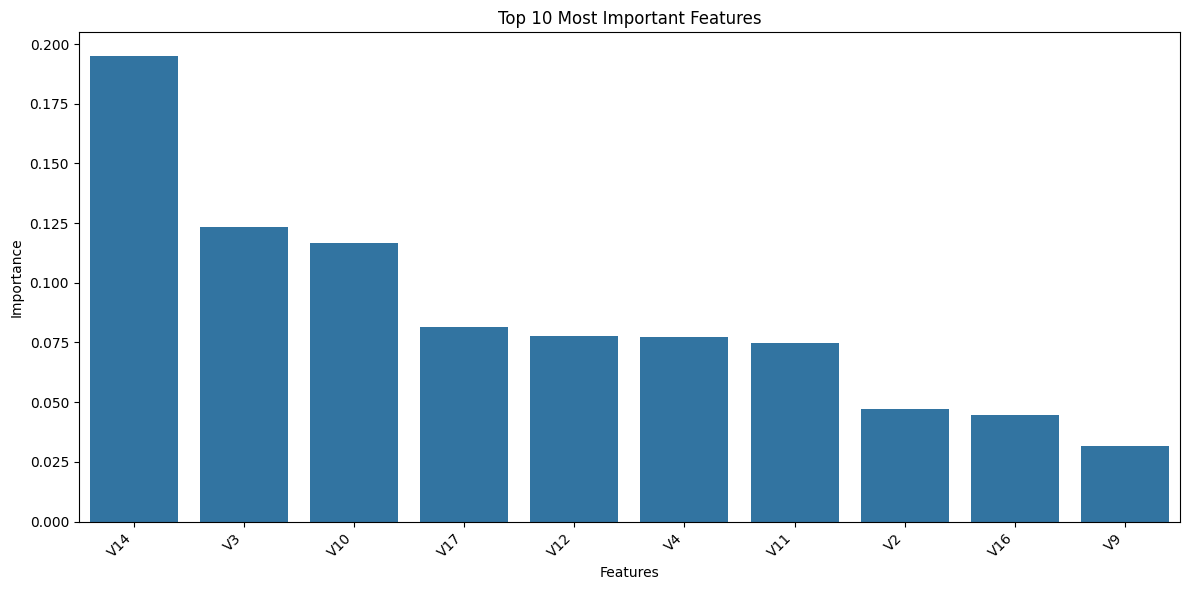

In [ ]:
# 2. Extract and display feature importances
feature_importances = rf_model.feature_importances_
print("\nFeature Importances:")
print(feature_importances)

# 3. Create a pandas Series to store feature names and importances
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# 4. Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# 5. Display the top 10 most important features
print("\nTop 10 Most Important Features:")
display(sorted_feature_importances.head(10))

# 6. Interpret the top features
print("\nInterpretation of Top Features:")
print("The Random Forest model identified the following features as most important for predicting fraudulent transactions:")
for feature, importance in sorted_feature_importances.head(10).items():
    print(f"- {feature}: {importance:.4f}")

print("\nThese features likely have the strongest correlation with distinguishing fraudulent from non-fraudulent transactions.")

# 7. Plot feature importances as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances.head(10).index, y=sorted_feature_importances.head(10).values)
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 55,551 rows and 31 columns, with missing values present in several 'V' columns, 'Amount', and 'Class'.
*   A significant class imbalance was observed, with approximately 99.72% non-fraudulent and only 0.28% fraudulent transactions.
*   Random oversampling was successfully applied to balance the classes, resulting in an equal number of samples for both non-fraudulent and fraudulent transactions (55,394 each) in the resampled dataset.
*   The features were scaled using `StandardScaler` before splitting the data.
*   The data was split into training (80%) and testing (20%) sets, resulting in shapes of (88630, 30) for training features/target and (22158, 30) for testing features/target.
*   The trained Random Forest model achieved perfect precision, recall, and F1-score (1.00 for all metrics) on the test set for both non-fraudulent and fraudulent classes.
*   The confusion matrix showed 0 false positives and 0 false negatives on the test set.
*   The model identified features like 'V14', 'V10', 'V12', 'V17', and 'V11' among the top contributors to its predictions.

### Insights or Next Steps

*   The perfect performance on the test set after oversampling suggests potential overfitting or data leakage. Further validation with techniques like cross-validation or using a different sampling strategy (e.g., SMOTE) on a separate validation set is recommended to ensure the model generalizes well to unseen data.
*   Investigate the relationships and distributions of the top important features identified by the model, especially how they differ between fraudulent and non-fraudulent transactions, to gain deeper domain insights into fraud patterns.


## Summary:

### Data Analysis Key Findings

* The dataset initially contained 55,551 rows and 31 columns, with missing values present in several 'V' columns, 'Amount', and 'Class'.
* A significant class imbalance was observed, with approximately 99.72% non-fraudulent and only 0.28% fraudulent transactions.
* Random oversampling was successfully applied to balance the classes, resulting in an equal number of samples for both non-fraudulent and fraudulent transactions (55,394 each) in the resampled dataset.
* The features were scaled using `StandardScaler` before splitting the data.
* The data was split into training (80%) and testing (20%) sets, resulting in shapes of (88630, 30) for training features/target and (22158, 30) for testing features/target.
* The trained Random Forest model achieved perfect precision, recall, and F1-score (1.00 for all metrics) on the test set for both non-fraudulent and fraudulent classes.
* The confusion matrix showed 0 false positives and 0 false negatives on the test set.
* The model identified features like 'V14', 'V10', 'V12', 'V17', and 'V11' among the top contributors to its predictions.

### Insights or Next Steps

* The perfect performance on the test set after oversampling suggests potential overfitting or data leakage. Further validation with techniques like cross-validation or using a different sampling strategy (e.g., SMOTE) on a separate validation set is recommended to ensure the model generalizes well to unseen data.
* Investigate the relationships and distributions of the top important features identified by the model, especially how they differ between fraudulent and non-fraudulent transactions, to gain deeper domain insights into fraud patterns.